In [32]:
%load_ext autoreload
%autoreload 2

import numpy as np
from srf.simulation import SimulationParams, generate_simulation_data
from srf.plotting import plot_matrices
from srf.models import TrifactorANLS, SymmetricANLS
from srf.rank_selection_cv import run_cv_rank_selection
from srf.utils import CVParams
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Generating membership matrix with 100 samples and 4 clusters


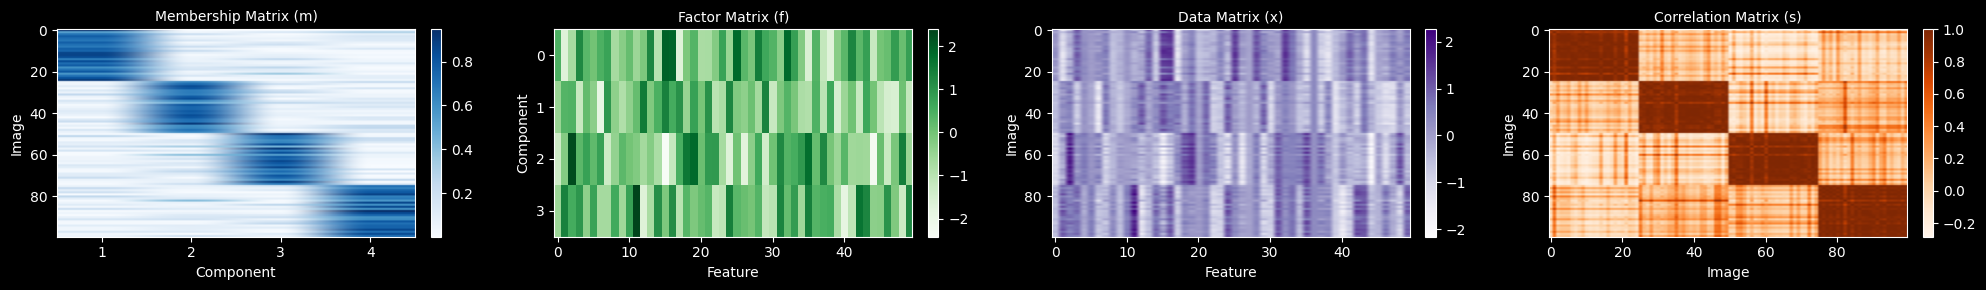

In [40]:
params = SimulationParams()
x, m, f = generate_simulation_data(params)
plot_matrices(x, m, f)

In [ ]:
model = TrifactorANLS(rank=10)
# model = SymmetricANLS(rank=10)
s = np.corrcoef(x)

model.fit(s)

TrifactorANLS(alpha=np.float64(1.0), rank=10)

In [30]:
cv_params = CVParams()
df = run_cv_rank_selection(
    model,
    s,
    cv_params.candidate_ranks,
    n_repeats=cv_params.n_repeats,
    n_splits=cv_params.n_splits,
    random_state=cv_params.random_state,
    verbose=cv_params.verbose,
)
sns.lineplot(df, x="rank", y="mse", marker="o")
sns.despine()

Running 125 tasks with 100 jobs


[Parallel(n_jobs=100)]: Using backend LokyBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   4 out of 125 | elapsed:    3.7s remaining:  1.9min
[Parallel(n_jobs=100)]: Done  17 out of 125 | elapsed:    4.1s remaining:   26.2s
[Parallel(n_jobs=100)]: Done  30 out of 125 | elapsed:    4.2s remaining:   13.4s
[Parallel(n_jobs=100)]: Done  43 out of 125 | elapsed:    4.7s remaining:    9.0s
[Parallel(n_jobs=100)]: Done  56 out of 125 | elapsed:    5.9s remaining:    7.3s
[Parallel(n_jobs=100)]: Done  69 out of 125 | elapsed:    6.3s remaining:    5.1s
[Parallel(n_jobs=100)]: Done  82 out of 125 | elapsed:    6.5s remaining:    3.4s
[Parallel(n_jobs=100)]: Done  95 out of 125 | elapsed:    7.0s remaining:    2.2s
[Parallel(n_jobs=100)]: Done 108 out of 125 | elapsed:    7.4s remaining:    1.2s
[Parallel(n_jobs=100)]: Done 121 out of 125 | elapsed:    7.7s remaining:    0.3s
[Parallel(n_jobs=100)]: Done 125 out of 125 | elapsed:    8.1s finished
